This notebook is just for presentation. The notebook is used to show and explain what we have done. The actual project files are .py files with a larger quantity of data and complicated computation.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix

In [39]:
movies = pd.read_csv('data/movies.csv')
movies.head()
genres = movies['genres']
genres_set = set()
for genre in genres:
    str_list = genre.split('|')
    for v in str_list:
        genres_set.add(v)
print(list(genres_set))

['Thriller', 'Sci-Fi', 'War', 'Western', 'Action', 'Horror', 'Crime', 'Children', 'Musical', 'Animation', 'Romance', 'Drama', 'Fantasy', 'Film-Noir', 'Mystery', '(no genres listed)', 'Adventure', 'Comedy', 'IMAX', 'Documentary']


In [3]:
ratings = pd.read_csv('data/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
import helper

In [47]:
genre_ratings = helper.get_genre_ratings(ratings, movies, ['Adventure', 'Sci-Fi'], ['avg_adventure_rating', 'avg_scifi_rating'])
genre_ratings.head()

,avg_romance_rating,avg_scifi_rating
1,4.31,4.22
2,4.50,3.88
3,0.50,4.20
4,3.38,2.83
5,3.09,2.50


In [16]:
print(genre_ratings[genre_ratings.isnull().T.any()])

     avg_romance_rating  avg_scifi_rating
60                 3.40               NaN
245                2.33               NaN
285                3.79               NaN
578                4.32               NaN
583                3.44               NaN
196                 NaN              3.86
329                 NaN              0.50
494                 NaN              4.44
549                 NaN              3.43


In [17]:
genre_ratings.dropna(axis=0, how='any', inplace=True)

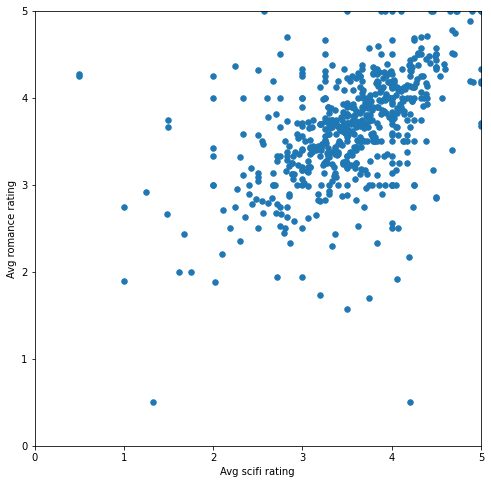

In [18]:
%matplotlib inline

helper.draw_scatterplot(genre_ratings['avg_scifi_rating'],'Avg scifi rating', genre_ratings['avg_adventure_rating'], 'Avg adventure rating')

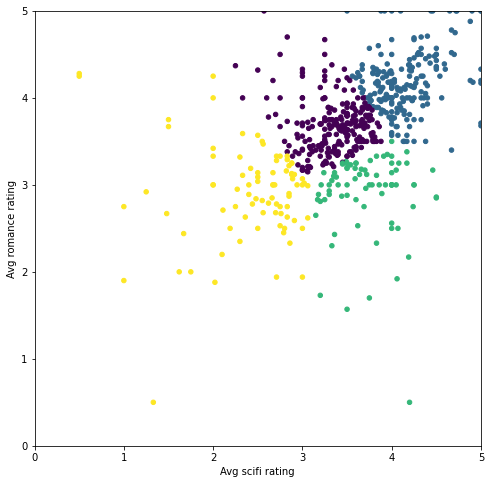

In [21]:
# Let's turn our dataset into a list
X = genre_ratings[['avg_scifi_rating','avg_adventure_rating']].values.tolist()

from sklearn.cluster import KMeans 
kmeans_1 = KMeans(n_clusters=4)
predictions = kmeans_1.fit_predict(X) 

# Plot
helper.draw_clusters(genre_ratings, predictions)

/Users/rickenqi/Documents/usc graduate/DSCI 550/DSCI550_Project/helper.py:167: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  user_movie_ratings = user_movie_ratings.append(user_movie_ratings.count(), ignore_index=True)


range(2, 20)


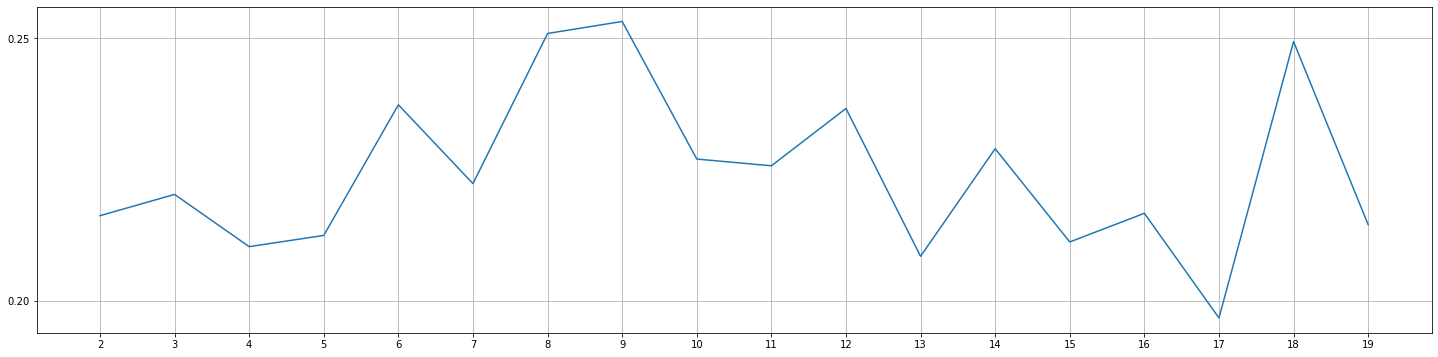

In [10]:
import helper
movies = pd.read_csv('data/movies.csv')
ratings = pd.read_csv('data/ratings.csv')
genres_test = ['Crime', 'Animation', 'Film-Noir', 'Fantasy', 'Sci-Fi', 'Adventure', 'Drama', 'War', 'Thriller',
                   'Documentary', 'Action', 'Comedy', 'Mystery', 'Musical', 'Romance', 'Horror']
rating_titles = []
for genre in genres_test:
    rating_titles.append('avg_' + genre)
genre_ratings = helper.get_genre_ratings(ratings, movies, genres_test, rating_titles)
genre_ratings = helper.get_most_rated_movies(genre_ratings, 1000)
genre_ratings = genre_ratings.fillna(value=0)
X = genre_ratings[rating_titles].values

# Choose the range of k values to test.
# We added a stride of 5 to improve performance. We don't need to calculate the error for every k value
possible_k_values = range(2, 20, 1)
print(possible_k_values)
# Calculate error values for all k values we're interested in
errors_per_k = [helper.clustering_errors(k, X) for k in possible_k_values]

# Plot the each value of K vs. the silhouette score at that value
fig, ax = plt.subplots(figsize=(25, 6))
plt.plot(possible_k_values, errors_per_k)

# Ticks and grid
xticks = np.arange(min(possible_k_values), max(possible_k_values)+1, 1.0)
ax.set_xticks(xticks, minor=False)
ax.set_xticks(xticks, minor=True)
ax.xaxis.grid(True, which='both')
yticks = np.arange(round(min(errors_per_k), 2), max(errors_per_k), .05)
ax.set_yticks(yticks, minor=False)
ax.set_yticks(yticks, minor=True)
ax.yaxis.grid(True, which='both')

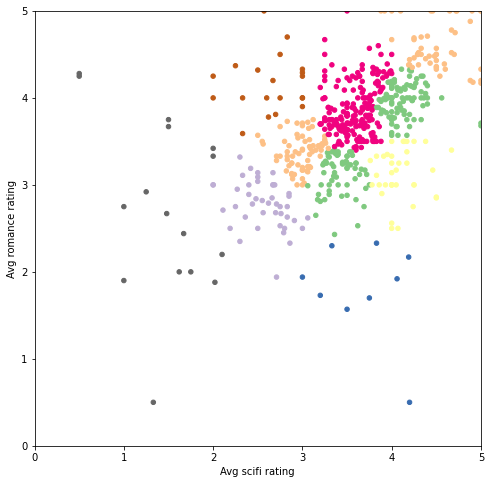

In [25]:
kmeans_4 = KMeans(n_clusters=12)
predictions_4 = kmeans_4.fit_predict(X)

# Plot
helper.draw_clusters(genre_ratings, predictions_4, cmap='Accent')

[[4.22 4.31 4.32]
 [3.88 4.5  3.95]
 [4.2  0.5  3.57]
 ...
 [3.3  2.89 3.33]
 [3.   3.2  3.09]
 [3.66 3.73 3.6 ]]


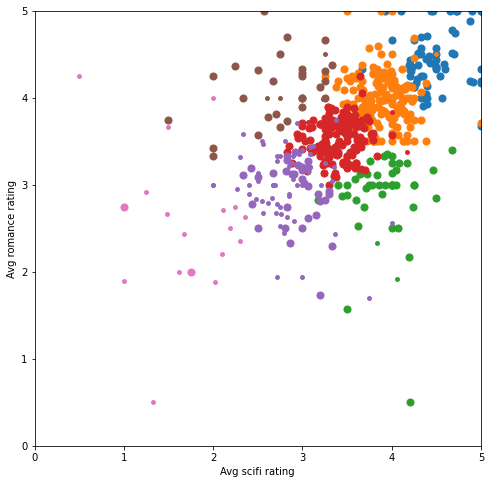

In [46]:
genre_ratings3 = helper.get_genre_ratings(ratings, movies, ['Romance', 'Sci-Fi', 'Action'], 
                                                     ['avg_romance_rating', 'avg_scifi_rating', 'avg_action_rating']).dropna()
X_with_action = genre_ratings3[['avg_scifi_rating',
                                         'avg_romance_rating', 
                                         'avg_action_rating']].values
print(X_with_action)

kmeans_5 = KMeans(n_clusters=7)
predictions_5 = kmeans_5.fit_predict(X_with_action)

# plot
helper.draw_clusters_3d(genre_ratings3, predictions_5)

In [28]:
# Merge the two tables then pivot so we have Users X Movies dataframe
ratings_title = pd.merge(ratings, movies[['movieId', 'title']], on='movieId' )
user_movie_ratings = pd.pivot_table(ratings_title, index='userId', columns= 'title', values='rating')

print('dataset dimensions: ', user_movie_ratings.shape, '\n\nSubset example:')
user_movie_ratings.iloc[:6, :10]

dataset dimensions:  (610, 9719) 

Subset example:


title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987)
userId,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
n_movies = 30
n_users = 18
most_rated_movies_users_selection = helper.sort_by_rating_density(user_movie_ratings, n_movies, n_users)

print('dataset dimensions: ', most_rated_movies_users_selection.shape)
most_rated_movies_users_selection.head()

dataset dimensions:  (18, 30)


/Users/rickenqi/Documents/usc graduate/DSCI 550/DSCI550_Project/helper.py:167: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  user_movie_ratings = user_movie_ratings.append(user_movie_ratings.count(), ignore_index=True)
/Users/rickenqi/Documents/usc graduate/DSCI 550/DSCI550_Project/helper.py:178: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  most_rated_movies['counts'] = pd.Series(most_rated_movies.count(axis=1))


title,Forrest Gump (1994),"Shawshank Redemption, The (1994)",Pulp Fiction (1994),"Silence of the Lambs, The (1991)","Matrix, The (1999)",Star Wars: Episode IV - A New Hope (1977),Jurassic Park (1993),Braveheart (1995),Terminator 2: Judgment Day (1991),Schindler's List (1993),...,Star Wars: Episode VI - Return of the Jedi (1983),"Godfather, The (1972)","Fugitive, The (1993)",Batman (1989),Saving Private Ryan (1998),"Lord of the Rings: The Two Towers, The (2002)","Lord of the Rings: The Return of the King, The (2003)",Aladdin (1992),Fargo (1996),"Sixth Sense, The (1999)"
413,5.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0,5.0,4.0,...,5.0,5.0,5.0,4.0,5.0,5.0,4.0,4.0,5.0,3.0
589,5.0,4.5,4.5,3.5,4.0,5.0,4.0,4.0,4.5,5.0,...,4.5,5.0,4.0,3.5,4.0,5.0,4.5,4.0,4.0,3.5
473,3.0,5.0,4.0,4.5,4.5,4.0,4.5,3.0,4.0,5.0,...,4.0,5.0,5.0,4.0,3.0,5.0,5.0,4.0,4.0,5.0
479,5.0,5.0,4.0,4.5,5.0,4.5,5.0,5.0,4.5,5.0,...,3.5,5.0,3.5,4.5,4.5,4.5,4.0,4.0,4.0,4.0
67,3.5,3.0,2.0,3.5,4.5,5.0,3.5,2.5,3.5,4.0,...,5.0,4.0,4.5,4.0,4.0,4.0,4.5,3.5,2.5,2.5


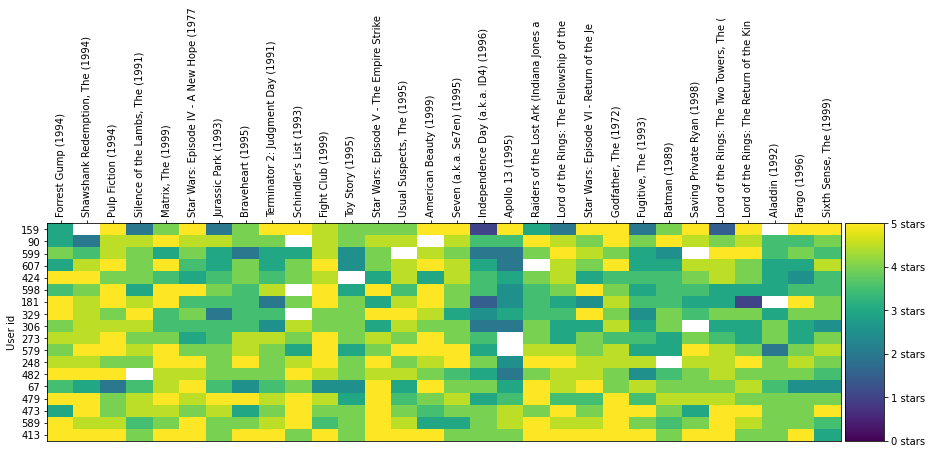

In [30]:
helper.draw_movies_heatmap(most_rated_movies_users_selection)

In [31]:
user_movie_ratings =  pd.pivot_table(ratings_title, index='userId', columns= 'title', values='rating')
most_rated_movies_1k = helper.get_most_rated_movies(user_movie_ratings, 1000)

/Users/rickenqi/Documents/usc graduate/DSCI 550/DSCI550_Project/helper.py:167: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  user_movie_ratings = user_movie_ratings.append(user_movie_ratings.count(), ignore_index=True)


In [12]:
ratings_title = pd.merge(ratings, movies[['movieId', 'title']], on='movieId' )
user_movie_ratings =  pd.pivot_table(ratings_title, index='userId', columns= 'title', values='rating')
most_rated_movies_1k = helper.get_most_rated_movies(user_movie_ratings, 1000)
sparse_ratings = csr_matrix(pd.SparseDataFrame(most_rated_movies_1k).to_coo())
predictions = KMeans(n_clusters=20, algorithm='full').fit_predict(sparse_ratings)

max_users = 70
max_movies = 50

clustered = pd.concat([most_rated_movies_1k.reset_index(), pd.DataFrame({'group':predictions})], axis=1)
print(clustered)
helper.draw_movie_clusters(clustered, max_users, max_movies)

/Users/rickenqi/Documents/usc graduate/DSCI 550/DSCI550_Project/helper.py:167: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  user_movie_ratings = user_movie_ratings.append(user_movie_ratings.count(), ignore_index=True)
/var/folders/h5/nj7nmj4j58lcp_56gcpy5qg40000gn/T/ipykernel_36240/3429391839.py:4: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version.
  sparse_ratings = csr_matrix(pd.SparseDataFrame(most_rated_movies_1k).to_coo())


TypeError: SparseDataFrame() takes no arguments